In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import apricot_fitter as af
import macaque_retina as mr
import visual_stimuli as vs

# MacaqueRetina demo

## Constructing a mosaic from data

In [2]:
gc_type = 'parasol'
response_type = 'on'

In [3]:
mos = mr.MosaicConstructor(gc_type, response_type, [4,5], [-5,5], randomize_position=0.1)
mos.build()

Fitting spatial  filters:   4%|▍         | 4/90 [00:00<00:02, 36.86it/s]


[parasol on]
Read 94 cells from datafile and then removed 4 bad cells (handpicked)
Fitting DoG model, surround is fixed


Fitting temporal filters: 100%|██████████| 90/90 [00:01<00:00, 78.34it/s]
WARNING    /home/henhok/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
 [py.warnings]
WARNING    /home/henhok/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
 [py.warnings]


Built RGC mosaic with 48 cells


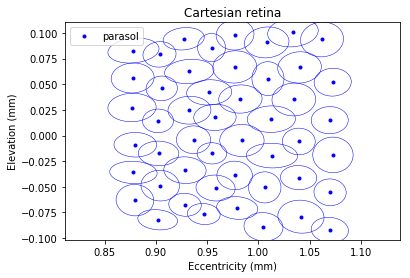

In [4]:
mos.visualize_mosaic()

In [5]:
# Saving & loading
#mosaic.save_mosaic('my_mosaic.csv')
#my_mosaic = pd.read_csv('my_mosaic.csv', index_col=0)

## Creating a model that takes in stimuli

In [6]:
# RGC parameters are given as a dataframe to FunctionalMosaic
# (can be extracted from the object or loaded from a CSV file)
my_mosaic = mos.gc_df  

In [7]:
ret = mr.FunctionalMosaic(my_mosaic, gc_type, response_type, stimulus_center=5+0j,
                         stimulus_width_pix=240, stimulus_height_pix=240)

In [8]:
grating = vs.ConstructStimulus(pattern='sine_grating', stimulus_form='circular',
                               temporal_frequency=4, spatial_frequency=2.0,
                               duration_seconds=2.0, orientation=0, image_width=240, image_height=240,
                               stimulus_size=0, contrast=0.5)

Making a stimulus with the following properties:
pattern : sine_grating
stimulus_form : circular
temporal_frequency : 4
spatial_frequency : 2.0
duration_seconds : 2.0
orientation : 0
image_width : 240
image_height : 240
stimulus_size : 0
contrast : 0.5


In [9]:
ret.load_stimulus(grating)

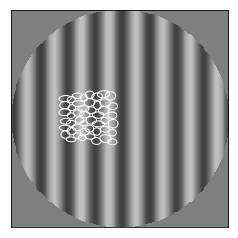

In [10]:
# The mosaic here should look the same as the mosaic above
ret.show_stimulus_with_gcs()

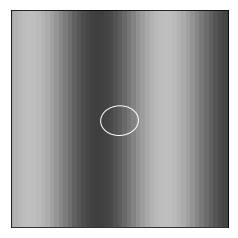

In [11]:
# Stimulus cropped to the surroundings of a RGC
cell_ix = 10
ret.show_single_gc_view(cell_ix)

## Create filters (no need to do this separately; just a demonstration)

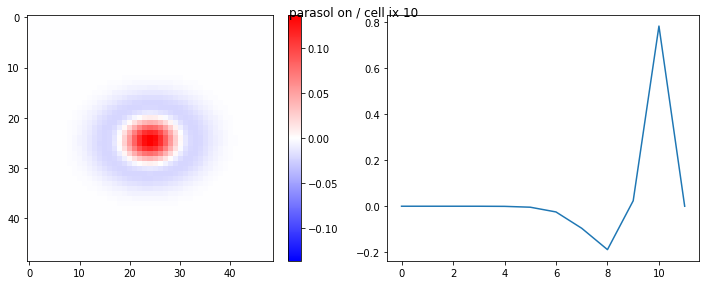

In [12]:
# Here the spatial filter should look similar (orientation, aspect ratio) to the single gc view above
ret.create_spatiotemporal_filter(cell_ix, visualize=True);

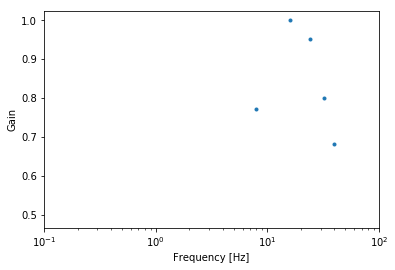

In [13]:
# Amplitude response function of the temporal filter
# Kaplan&Benardete 2001 Prog Brain Res (anesthetized macaque):
#   - For parasols, peak should be around 16 Hz (contrast > 12%)
#   - At 1% contrast, peak should be at around 8 Hz (through contrast gain control; not implemented)
#   - For midgets, peak should be at around 8 Hz
# Alert macaque LGN cells prefer higher temporal frequencies (Alitto,...,Usrey 2011 J Physiol)
ret.plot_tf_amplitude_response(cell_ix)

## Convolution (no need to do this separately)

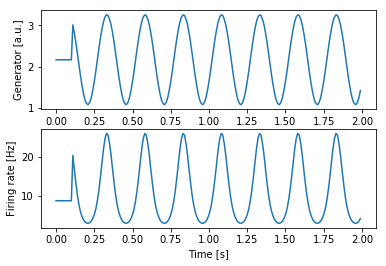

In [14]:
# Generator = convolution + tonic drive
# Firing rate = nonlinearity(generator); here nonlinearity is exp
# Firing rate NOT tuned to experimental data
ret.convolve_stimulus(cell_ix, visualize=True);

## Create spikes

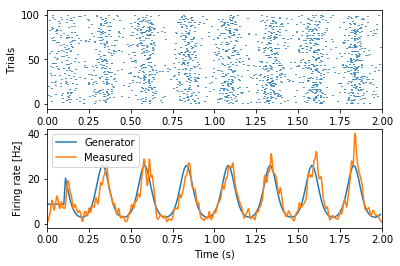

In [15]:
# One cell, multiple trials
ret.run_single_cell(cell_ix, n_trials=100, visualize=True);

Simulating on parasol mosaic: 100%|██████████| 48/48 [00:15<00:00,  2.94it/s]


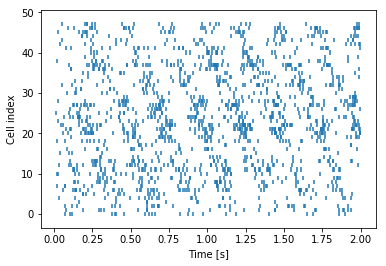

In [16]:
# All cells, single trial
ret.run_all_cells(visualize=True);

In [17]:
# Save generated data
#ret.save_spikes_csv('my_spikes.csv')
#ret.save_structure_csv('my_coordinates.csv')
# Can be used in ViSimpl: visimpl.AppImage -csv my_coordinates.csv my_spikes.csv

## Finally, with both on and off

In [18]:
#
mos_off = mr.MosaicConstructor(gc_type, 'off', [4,5], [-5,5], randomize_position=0.1)
mos_off.build()
ret_off = mr.FunctionalMosaic(mos_off.gc_df, gc_type, 'off', stimulus_center=5+0j,
                         stimulus_width_pix=240, stimulus_height_pix=240)
ret_off.load_stimulus(grating)

Fitting spatial  filters:   5%|▌         | 4/75 [00:00<00:01, 37.00it/s]


[parasol off]
Read 79 cells from datafile and then removed 4 bad cells (handpicked)
Fitting DoG model, surround is fixed


Fitting temporal filters: 100%|██████████| 75/75 [00:00<00:00, 82.49it/s]


Built RGC mosaic with 75 cells


In [19]:
ret_off.run_all_cells()

Simulating off parasol mosaic: 100%|██████████| 75/75 [00:25<00:00,  2.98it/s]


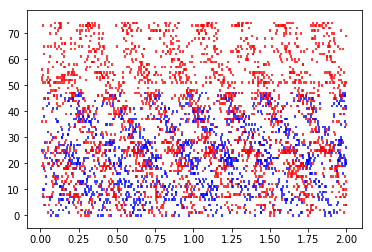

In [20]:
plt.eventplot(ret.simulated_spiketrains, colors='blue');
plt.eventplot(ret_off.simulated_spiketrains, colors='red');